# **Table of Contents**
* [Create](#section_1)
* [Basic info](#section_2)
* [Access](#section_3)
* [Restrict](#section_4)
* [Add](#section_5)
* [Apply](#section_6)
* [Null](#section_7)
* [Math funcs](#section_8)
* [Sort , nlargest](#section_9)
* [Delete , Drop](#section_10)
* [Rename](#section_11)
* [Replace](#section_12)
* [Rank](#section_13)
* [Map](#section_14)
* [Combine](#section_15)
* [Duplicates](#section_16)
* [Concatenate](#section_17)
* [Merge , Join](#section_18)
* [Pivot , Crosstab](#section_19)
* [Unique](#section_20)
* [Count](#section_21)
* [Groupby](#section_22)
* [Datetime](#section_23)

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns

from pandas import Series , DataFrame

import warnings
warnings.simplefilter("ignore")

<a id='section_1'></a>
# 1. **Create**

In [2]:
df = DataFrame  (  np.arange(1,10).reshape(3,3)  )
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [3]:
df  =  DataFrame   (  np.arange(1,10).reshape(3,3)  ,  index   = ['A','B','C']    ,  columns = ['X','Y','Z']  )
df

,X,Y,Z
A,1,2,3
B,4,5,6
C,7,8,9


In [4]:
df  =  DataFrame  (  np.random.randn(5,4)  ,  index = 'a b c d e'.split()  ,  columns='w x y z'.split()  )
df 

,w,x,y,z
a,-1.343097,0.649429,0.979317,0.039479
b,-2.818169,0.081875,-1.964403,0.842285
c,0.823995,0.335850,-0.318260,0.188158
d,-0.111173,0.329366,-0.010004,-1.006868
e,-2.311447,-0.069859,-2.399638,-1.858086


In [5]:
data   =  [ ('c',10,20) , ('b',30,40) , ('a',50,60) , ('a',70,80) ] 

labels =  ['Name' , 'sub1' , 'sub2']

df  =  pd.DataFrame.from_records (data , columns=labels)
df

,Name,sub1,sub2
0,c,10,20
1,b,30,40
2,a,50,60
3,a,70,80


In [6]:
df  =  DataFrame  ( { 'A':[1,2,3] , 'B':[10,20,30] , 'C':[100,200,300] } )
df

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300


In [7]:
df  =  DataFrame ( { 'A':[1,2,3] , 'B':[10,20,30] , 'C':[100,200,300] }    ,   index=['X','Y','Z'] )
df

,A,B,C
X,1,10,100
Y,2,20,200
Z,3,30,300


<a id='section_2'></a>
# 2. **Basic Info**

In [8]:
print ( df.index   ) 
print ( df.columns ) 

print ( df.dtypes  ) 
print ( df.shape   ) 

Index(['X', 'Y', 'Z'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')
A    int64
B    int64
C    int64
dtype: object
(3, 3)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, X to Z
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   C       3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


In [10]:
df.head(2)

,A,B,C
X,1,10,100
Y,2,20,200


In [11]:
df.tail(2)

,A,B,C
Y,2,20,200
Z,3,30,300


In [12]:
df.sample(2)

,A,B,C
Z,3,30,300
X,1,10,100


<a id='section_3'></a>
# 3. **Access Elements**

### **i. By Columns**

In [13]:
df ['A']

X    1
Y    2
Z    3
Name: A, dtype: int64

In [14]:
df ['A'].values

array([1, 2, 3], dtype=int64)

In [15]:
df [['A','B']]

,A,B
X,1,10
Y,2,20
Z,3,30


In [16]:
df.filter ( ['A','B'] )

,A,B
X,1,10
Y,2,20
Z,3,30


### **ii. By Index**

In [17]:
df ['A'].index

Index(['X', 'Y', 'Z'], dtype='object')

In [18]:
df [1:3]

,A,B,C
Y,2,20,200
Z,3,30,300


### **iii. By Logic**

In [19]:
df  [ df['B']<25 ]                                   # get the entire DF , where value in B column meets condition

,A,B,C
X,1,10,100
Y,2,20,200


In [20]:
df  [  df['B'] == df['B'].max()  ]

,A,B,C
Z,3,30,300


In [21]:
df  [  (df['B']>15)  &  (df['B']<25)  ]               #   &, | operators

,A,B,C
Y,2,20,200


In [22]:
df  [  ( df['B']==10)  |  (df['C']==200)  ] 

,A,B,C
X,1,10,100
Y,2,20,200


In [23]:
df ['A']              [ (df['B']>15)  &  (df['B']<25) ]              

Y    2
Name: A, dtype: int64

In [24]:
df [['A','B']]       [ (df['B']>15)  &  (df['B']<25) ]                

,A,B
Y,2,20


### **iv. By Location**

**IAT**

In [25]:
df.iat [1,2]

200

**ILOC**

In [26]:
df.iloc [0]

A      1
B     10
C    100
Name: X, dtype: int64

In [27]:
df.iloc [1:3]

,A,B,C
Y,2,20,200
Z,3,30,300


In [28]:
df.iloc [:3]

,A,B,C
X,1,10,100
Y,2,20,200
Z,3,30,300


In [29]:
df.iloc [::2]           #  step-size 2 

,A,B,C
X,1,10,100
Z,3,30,300


In [30]:
df.iloc [2,2]              #  RC combo

300

* 2 methods for R,C slicing

In [31]:
df.iloc [1:3 , 0:2]       

,A,B
Y,2,20
Z,3,30


In [32]:
df [['A','B']]  .iloc [1:3]

,A,B
Y,2,20
Z,3,30


**LOC**

In [33]:
df.loc['X']

A      1
B     10
C    100
Name: X, dtype: int64

In [34]:
df.loc [['X','Y']]                #  multiple index

,A,B,C
X,1,10,100
Y,2,20,200


In [35]:
df.loc [['X','Y'] , ['A','B']]     

,A,B
X,1,10
Y,2,20


In [36]:
df.loc ['X','A']                   # RC combo

1

In [37]:
df.loc ['X':'Y' , 'B':'C']         # RC combo slicing      

,B,C
X,10,100
Y,20,200


<a id='section_4'></a>
# 4. **Restrict**

In [38]:
df  [ df ['C'].between (100,250) ]

,A,B,C
X,1,10,100
Y,2,20,200


In [39]:
df.clip (1,25)             # temp change         # lower limit , Upper limit

,A,B,C
X,1,10,25
Y,2,20,25
Z,3,25,25


<a id='section_5'></a>
# 5. **Add**

### **i. 1 element** 

In [40]:
df .loc['X','A']  =  77                      # add new    or   modify existing
df

,A,B,C
X,77,10,100
Y,2,20,200
Z,3,30,300


### **ii. Row**

In [41]:
df .loc['A']     =   [4,40,400]
df

,A,B,C
X,77,10,100
Y,2,20,200
Z,3,30,300
A,4,40,400


### **iii. Col**

In [42]:
df ['D']  =  1000                              #  df ['D']  =  df['A'] + df['B'] 
df

,A,B,C,D
X,77,10,100,1000
Y,2,20,200,1000
Z,3,30,300,1000
A,4,40,400,1000


In [43]:
df ['D']  =  [1000,2000,3000,4000]
df

,A,B,C,D
X,77,10,100,1000
Y,2,20,200,2000
Z,3,30,300,3000
A,4,40,400,4000


In [44]:
df ['E']  =  df['D'] - df['D']*0.1        #  else,  df['D']* 0.9
df

,A,B,C,D,E
X,77,10,100,1000,900.0
Y,2,20,200,2000,1800.0
Z,3,30,300,3000,2700.0
A,4,40,400,4000,3600.0


In [45]:
ls = [555 , 666 , 777 , 888]

df.insert ( 4 , "hello", ls )                      # col index , col name , list
df

,A,B,C,D,hello,E
X,77,10,100,1000,555,900.0
Y,2,20,200,2000,666,1800.0
Z,3,30,300,3000,777,2700.0
A,4,40,400,4000,888,3600.0


<a id='section_6'></a>
# 6. **Apply**

In [46]:
def fun(x):
    return x*4

In [47]:
df ['D']  =  df ['D'] .apply (fun)
df

,A,B,C,D,hello,E
X,77,10,100,4000,555,900.0
Y,2,20,200,8000,666,1800.0
Z,3,30,300,12000,777,2700.0
A,4,40,400,16000,888,3600.0


In [48]:
df ['E']  =  df['D'] .apply (np.sqrt)
df

,A,B,C,D,hello,E
X,77,10,100,4000,555,63.245553
Y,2,20,200,8000,666,89.442719
Z,3,30,300,12000,777,109.544512
A,4,40,400,16000,888,126.491106


<a id='section_7'></a>
# 7. **Null**

In [49]:
df = DataFrame ( { 'A':[np.nan,2,3,4] , 'B':[10,np.nan,np.nan,40] , 'C':[100,200,np.nan,400] } )
df

,A,B,C
0,NaN,10.0,100.0
1,2.0,NaN,200.0
2,3.0,NaN,NaN
3,4.0,40.0,400.0


### i. **CHECK**

In [50]:
df.isna()

,A,B,C
0,True,False,False
1,False,True,False
2,False,True,True
3,False,False,False


In [51]:
df  [ df['B'].isna() ]                  # to extract only those rowa

,A,B,C
1,2.0,NaN,200.0
2,3.0,NaN,NaN


In [52]:
df.isnull()

,A,B,C
0,True,False,False
1,False,True,False
2,False,True,True
3,False,False,False


In [53]:
df.isnull().sum()

A    1
B    2
C    1
dtype: int64

In [54]:
df.notnull()

,A,B,C
0,False,True,True
1,True,False,True
2,True,False,False
3,True,True,True


**Tabular Display**

In [55]:
total    =    df.isnull().sum()                                  .sort_values(ascending =False)
percent  =    df.isnull().sum() / df.isnull().count()            .sort_values(ascending =False)
 

table    =    pd.concat ( [total,percent] , axis =1 , keys =['Total','%'] )

table.sort_values (by ='%', ascending =False)

,Total,%
B,2,0.50
C,1,0.25
A,1,0.25


**Graphical Display**

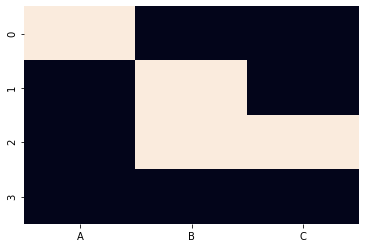

In [56]:
sns.heatmap ( df.isnull() , cbar=False ) ;

### ii. **DROP**

**Type 1**

In [57]:
df.dropna()

,A,B,C
3,4.0,40.0,400.0


In [58]:
df.dropna (axis=1)

""
0
1
2
3


**Type 2**

In [59]:
df.dropna (how='all')                # row  

,A,B,C
0,NaN,10.0,100.0
1,2.0,NaN,200.0
2,3.0,NaN,NaN
3,4.0,40.0,400.0


In [60]:
df.dropna (how='all' , axis=1)       # col

,A,B,C
0,NaN,10.0,100.0
1,2.0,NaN,200.0
2,3.0,NaN,NaN
3,4.0,40.0,400.0


**Type 3**

In [61]:
df.dropna (thresh=2)                        #  if 2 non-null values , keep the row

,A,B,C
0,NaN,10.0,100.0
1,2.0,NaN,200.0
3,4.0,40.0,400.0


In [62]:
df.dropna ( thresh=2, axis=1 )               #  if 2 non-null values , keep the col

,A,B,C
0,NaN,10.0,100.0
1,2.0,NaN,200.0
2,3.0,NaN,NaN
3,4.0,40.0,400.0


**Type 4**

In [63]:
df.dropna ( subset=['A','B'] )               # wherever NAN present for column A & B, delete the entire row

,A,B,C
3,4.0,40.0,400.0


### iii. **FILL**

In [64]:
df.fillna (0)                             

,A,B,C
0,0.0,10.0,100.0
1,2.0,0.0,200.0
2,3.0,0.0,0.0
3,4.0,40.0,400.0


In [65]:
df.fillna  ( df.mean() )

,A,B,C
0,3.0,10.0,100.000000
1,2.0,25.0,200.000000
2,3.0,25.0,233.333333
3,4.0,40.0,400.000000


In [66]:
df ['B'].fillna  ( df['B'].mean() )                 #  Fill  Col's Nulls  with  Col's Mean

0    10.0
1    25.0
2    25.0
3    40.0
Name: B, dtype: float64

In [67]:
df.fillna  ('No value')

,A,B,C
0,No value,10,100
1,2,No value,200
2,3,No value,No value
3,4,40,400


In [68]:
df.fillna ( {'B':'None'} )                    # 'B' is the col name

,A,B,C
0,NaN,10,100.0
1,2.0,None,200.0
2,3.0,None,NaN
3,4.0,40,400.0


In [69]:
for i in ['B','C']:
    
    df [i].fillna   ( df [i].median() )

In [70]:
for i in ['B','C']:
    
    df [i].fillna   ( df [i].mode()[0] )

In [71]:
df.fillna ( method='ffill')                         #  fills NaN with previous value in that col  

,A,B,C
0,NaN,10.0,100.0
1,2.0,10.0,200.0
2,3.0,10.0,200.0
3,4.0,40.0,400.0


In [72]:
df.fillna ( method='bfill')

,A,B,C
0,2.0,10.0,100.0
1,2.0,40.0,200.0
2,3.0,40.0,400.0
3,4.0,40.0,400.0


<a id='section_8'></a>
# 8. **Math funcs**

<a id='section_9'></a>
# 9. **Sort**

In [73]:
df = DataFrame ( { 'Name': ['A','B','C','D','E']    ,   'Score': np.random.randint(1,50,5) } )
df

,Name,Score
0,A,21
1,B,8
2,C,6
3,D,4
4,E,45


In [74]:
df  .sort_values (by = 'Score')

,Name,Score
3,D,4
2,C,6
1,B,8
0,A,21
4,E,45


In [75]:
df  .sort_values (by = 'Score' , ascending=False)

,Name,Score
4,E,45
0,A,21
1,B,8
2,C,6
3,D,4


In [76]:
df [['Name','Score']]     .sort_values  ( by='Score',ascending=False )      .head(3)

,Name,Score
4,E,45
0,A,21
1,B,8


### Nlargest

In [77]:
df [['Name','Score']]     .nlargest  (3,'Score') 

,Name,Score
4,E,45
0,A,21
1,B,8


### Index sort

In [78]:
df.sort_index (ascending = False)

,Name,Score
4,E,45
3,D,4
2,C,6
1,B,8
0,A,21


### Priority sort

In [79]:
df ['Score 2']  =  np.random.randint(1,50,5)       #  creating new column

df.iloc [1:3 , 1] = 40                             #  assign same score
df

,Name,Score,Score 2
0,A,21,10
1,B,40,35
2,C,40,27
3,D,4,2
4,E,45,31


In [80]:
df.sort_values ( by=['Score','Score 2']  , ascending=False )                 #  sort both Cols in descending

,Name,Score,Score 2
4,E,45,31
1,B,40,35
2,C,40,27
0,A,21,10
3,D,4,2


In [81]:
df.sort_values ( by=['Score','Score 2']  ,  ascending=[True,False] )         #  sort Col1 as ASC, if same , Col2 as DESC

,Name,Score,Score 2
3,D,4,2
0,A,21,10
1,B,40,35
2,C,40,27
4,E,45,31


<a id='section_10'></a>
# 10. **Delete , Drop**

In [82]:
df = DataFrame ( np.arange(1,26).reshape(5,5)  ,  index=['P','Q','R','S','T']   , columns=['A','B','C','D','E']  )
df

,A,B,C,D,E
P,1,2,3,4,5
Q,6,7,8,9,10
R,11,12,13,14,15
S,16,17,18,19,20
T,21,22,23,24,25


In [83]:
del  df ['E']
df

,A,B,C,D
P,1,2,3,4
Q,6,7,8,9
R,11,12,13,14
S,16,17,18,19
T,21,22,23,24


### **Dropping**

In [84]:
df.drop ('P')

,A,B,C,D
Q,6,7,8,9
R,11,12,13,14
S,16,17,18,19
T,21,22,23,24


In [85]:
df.drop ('P',inplace=True)              # axis = 0

In [86]:
df.drop (['Q','R'])                                 

,A,B,C,D
S,16,17,18,19
T,21,22,23,24


In [87]:
df.drop (['C','D'] , axis=1)

,A,B
Q,6,7
R,11,12
S,16,17
T,21,22


### **Droppping without label**

In [88]:
df

,A,B,C,D
Q,6,7,8,9
R,11,12,13,14
S,16,17,18,19
T,21,22,23,24


Dropping last column

In [89]:
df.columns[-1]

'D'

In [90]:
df.drop ( df.columns[-1]  ,  axis=1 )

,A,B,C
Q,6,7,8
R,11,12,13
S,16,17,18
T,21,22,23


Dropping 2nd,3rd row

In [91]:
df.drop ( df.index[1:3] )

,A,B,C,D
Q,6,7,8,9
T,21,22,23,24


### **Droppping wrt condition**

Row

In [92]:
df.drop ( df [ df.C == 8 ].index , inplace=True )

<a id='section_11'></a>
# 11. **Rename**

In [93]:
df = DataFrame ( np.arange(1,26).reshape(5,5)   ,  index=['P','Q','R','S','T']    ,  columns=['A','B','C','D','E'] )
df

,A,B,C,D,E
P,1,2,3,4,5
Q,6,7,8,9,10
R,11,12,13,14,15
S,16,17,18,19,20
T,21,22,23,24,25


**Index**

In [94]:
df.rename ( {'P':'Park', 'Q':'Quart'} , inplace=True )
df

,A,B,C,D,E
Park,1,2,3,4,5
Quart,6,7,8,9,10
R,11,12,13,14,15
S,16,17,18,19,20
T,21,22,23,24,25


**Column**

In [95]:
df.rename ( {'A':'Alpha', 'B':'Beta'} , axis=1 , inplace=True )
df

,Alpha,Beta,C,D,E
Park,1,2,3,4,5
Quart,6,7,8,9,10
R,11,12,13,14,15
S,16,17,18,19,20
T,21,22,23,24,25


**Row-Column combined** 

In [96]:
df.rename ( index = {'S':'Snake', 'T':'Tortoise'}   ,   columns = {'D':'Dog', 'E':'Elephant'}   ,  inplace=True )
df

,Alpha,Beta,C,Dog,Elephant
Park,1,2,3,4,5
Quart,6,7,8,9,10
R,11,12,13,14,15
Snake,16,17,18,19,20
Tortoise,21,22,23,24,25


<a id='section_12'></a>
# 12. **Replace**

In [97]:
df = DataFrame ( np.arange(1,10).reshape(3,3)   ,  index   = ['P','Q','R']      ,  columns = ['A','B','C']  )
df

,A,B,C
P,1,2,3
Q,4,5,6
R,7,8,9


**With Dictionary**

In [98]:
df.replace ( {2:200 , 4:400, 6:600} )

,A,B,C
P,1,200,3
Q,400,5,600
R,7,8,9


In [99]:
df ['C'].replace ( {9:900} )

P      3
Q      6
R    900
Name: C, dtype: int64

**With List**

In [100]:
df.replace ( [1,8,3] , [100,800,300] )

,A,B,C
P,100,2,300
Q,4,5,6
R,7,800,9


<a id='section_13'></a>
# 13. **Rank**

In [101]:
df = DataFrame ( { 'Student': ['A','B','C','D','E']   ,  'Marks' : np.random.randint (1,50,5) } )

df.iloc [0:2 , 1] = 26     # making 2 marks same
df

,Student,Marks
0,A,26
1,B,26
2,C,47
3,D,4
4,E,10


In [102]:
df ['Rank Avg 1']   =   df['Marks'].rank()             # method = 'average'      # ascending = True
df

,Student,Marks,Rank Avg 1
0,A,26,3.5
1,B,26,3.5
2,C,47,5.0
3,D,4,1.0
4,E,10,2.0


In [103]:
df ['Rank Avg 2']   =   df['Marks'].rank (method='average' , ascending =1)  
df

,Student,Marks,Rank Avg 1,Rank Avg 2
0,A,26,3.5,3.5
1,B,26,3.5,3.5
2,C,47,5.0,5.0
3,D,4,1.0,1.0
4,E,10,2.0,2.0


In [104]:
df ['Rank Min']   =   df['Marks'].rank (method='min')
df

,Student,Marks,Rank Avg 1,Rank Avg 2,Rank Min
0,A,26,3.5,3.5,3.0
1,B,26,3.5,3.5,3.0
2,C,47,5.0,5.0,5.0
3,D,4,1.0,1.0,1.0
4,E,10,2.0,2.0,2.0


In [105]:
df ['Rank Max']   =   df['Marks'].rank (method='max')
df

,Student,Marks,Rank Avg 1,Rank Avg 2,Rank Min,Rank Max
0,A,26,3.5,3.5,3.0,4.0
1,B,26,3.5,3.5,3.0,4.0
2,C,47,5.0,5.0,5.0,5.0
3,D,4,1.0,1.0,1.0,1.0
4,E,10,2.0,2.0,2.0,2.0


In [106]:
df ['Rank Dense']   =   df['Marks'].rank (method='dense')
df

,Student,Marks,Rank Avg 1,Rank Avg 2,Rank Min,Rank Max,Rank Dense
0,A,26,3.5,3.5,3.0,4.0,3.0
1,B,26,3.5,3.5,3.0,4.0,3.0
2,C,47,5.0,5.0,5.0,5.0,4.0
3,D,4,1.0,1.0,1.0,1.0,1.0
4,E,10,2.0,2.0,2.0,2.0,2.0


In [107]:
df ['Rank First']   =   df['Marks'].rank (method='first')
df

,Student,Marks,Rank Avg 1,Rank Avg 2,Rank Min,Rank Max,Rank Dense,Rank First
0,A,26,3.5,3.5,3.0,4.0,3.0,3.0
1,B,26,3.5,3.5,3.0,4.0,3.0,4.0
2,C,47,5.0,5.0,5.0,5.0,4.0,5.0
3,D,4,1.0,1.0,1.0,1.0,1.0,1.0
4,E,10,2.0,2.0,2.0,2.0,2.0,2.0


<a id='section_14'></a>
# 14. **Map**

In [108]:
df = DataFrame ( { 'Name' : ['A','B','C','D']   ,   'Sem 1' : np.random.randint(50,101,4) } )
df

,Name,Sem 1
0,A,63
1,B,62
2,C,98
3,D,91


**Type 1**

In [109]:
d  =  {'C':67, 'D':77, 'A':57, 'B':87}

df ['Sem 2']   =   df['Name'] .map (d)
df

,Name,Sem 1,Sem 2
0,A,63,57
1,B,62,87
2,C,98,67
3,D,91,77


**Type 2**

In [110]:
df ['Name']  =  df ['Name'].map    ( {'A':'Arun' , 'B':'Bikash' , 'C':'Chetan' , 'D':'Dhiraj' } )
df

,Name,Sem 1,Sem 2
0,Arun,63,57
1,Bikash,62,87
2,Chetan,98,67
3,Dhiraj,91,77


<a id='section_15'></a>
# 15. **Combine**

### Series

In [111]:
s1  =  Series   ( [1,np.nan,3,np.nan,5]  ,  index = ['A','B','C','D','E'] )
s2  =  Series   ( [10,20,30,40,50]       ,  index = ['A','B','C','D','E'] )        # reference Series

In [112]:
s1.combine_first(s2)

A     1.0
B    20.0
C     3.0
D    40.0
E     5.0
dtype: float64

### DataFrame

In [113]:
df1  =  DataFrame ({ 'A': [1,2,3,np.nan] ,
                     'B': [5,np.nan,7,np.nan] 
                  })

df2  =  DataFrame ({ 'A': [10,20,np.nan,40,50] ,
                     'B': [50,60,70,np.nan,90] ,
                     'C': [100,200,300,400,500]
                  })

In [114]:
df1.combine_first (df2)

,A,B,C
0,1.0,5.0,100.0
1,2.0,60.0,200.0
2,3.0,7.0,300.0
3,40.0,NaN,400.0
4,50.0,90.0,500.0


<a id='section_16'></a>
# 16. **Duplicates**

In [115]:
df = DataFrame ( { 'X': ['A','A','A','B','B'] , 'Y': [1,1,2,2,2] } )
df

,X,Y
0,A,1
1,A,1
2,A,2
3,B,2
4,B,2


### duplicated

In [116]:
df.duplicated().sum()

2

In [117]:
df ['X'].duplicated().sum()

3

In [118]:
df [ df.duplicated() ]

,X,Y
1,A,1
4,B,2


In [119]:
df   [ df.duplicated ('X') ]  ['X']

1    A
2    A
4    B
Name: X, dtype: object

In [120]:
df   [ df.duplicated (keep = False) ]                    #  displays all duplicate rows

,X,Y
0,A,1
1,A,1
3,B,2
4,B,2


In [121]:
df   [ df.duplicated (keep = 'last') ]

,X,Y
0,A,1
3,B,2


### drop_duplicates

In [122]:
df.drop_duplicates()                                  # keeps first , drops rest

,X,Y
0,A,1
2,A,2
3,B,2


In [123]:
df.drop_duplicates ('X')                            

,X,Y
0,A,1
3,B,2


In [124]:
df.drop_duplicates (keep=False)                      #  drops all duplicate rows

,X,Y
2,A,2


In [125]:
df.drop_duplicates (keep='last')

,X,Y
1,A,1
2,A,2
4,B,2


<a id='section_17'></a>
# 17. **Concatenate**

**Series**

In [126]:
s1  =  Series ( [1,2,3] ,  index=['A','B','C'])
s2  =  Series ( [10,20] ,  index=['X','Y'])

In [127]:
pd.concat ( [s1,s2] )        # by default: axis=0 & row_stack

A     1
B     2
C     3
X    10
Y    20
dtype: int64

In [128]:
pd.concat ( [s1,s2] , axis=1 )                 

,0,1
A,1.0,NaN
B,2.0,NaN
C,3.0,NaN
X,NaN,10.0
Y,NaN,20.0


**DataFrame**

In [129]:
df1  =  DataFrame (np.arange(1,17).reshape(4,4))
df2  =  DataFrame (np.arange(1,9) .reshape(2,4))

In [130]:
pd.concat ( [df1,df2] )

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
3,13,14,15,16
0,1,2,3,4
1,5,6,7,8


In [131]:
pd.concat ( [df1,df2] , axis=1 )

,0,1,2,3,0,1,2,3
0,1,2,3,4,1.0,2.0,3.0,4.0
1,5,6,7,8,5.0,6.0,7.0,8.0
2,9,10,11,12,NaN,NaN,NaN,NaN
3,13,14,15,16,NaN,NaN,NaN,NaN


<a id='section_18'></a>
# 18. **Merge , Join**

In [132]:
df1 = DataFrame ( { 'Key'   : ['X','Z','Y','Z','X','X'] ,   'Data1' : [0,1,2,3,4,5] } )
                               
df2 = DataFrame ( { 'Key'   : ['Q','Y','Z']             ,   'Data2' : [10,20,30]    } )

### **Merge**

In [133]:
pd.merge (df1,df2)          # by default : how = 'inner'

,Key,Data1,Data2
0,Z,1,30
1,Z,3,30
2,Y,2,20


In [134]:
pd.merge (df1,df2, how = 'outer')

,Key,Data1,Data2
0,X,0.0,NaN
1,X,4.0,NaN
2,X,5.0,NaN
3,Z,1.0,30.0
4,Z,3.0,30.0
5,Y,2.0,20.0
6,Q,NaN,10.0


In [135]:
pd.merge (df1,df2, how = 'left')

,Key,Data1,Data2
0,X,0,NaN
1,Z,1,30.0
2,Y,2,20.0
3,Z,3,30.0
4,X,4,NaN
5,X,5,NaN


In [136]:
pd.merge ( df1,df2, how = 'right')

,Key,Data1,Data2
0,Q,NaN,10
1,Y,2.0,20
2,Z,1.0,30
3,Z,3.0,30


In [137]:
pd.merge ( df1,df2, how='inner', on='Key')

,Key,Data1,Data2
0,Z,1,30
1,Z,3,30
2,Y,2,20


### **Join**

In [138]:
df3  =  DataFrame  ( { 'Q1': [1,2,3]       ,  'Q2': [4,5,6]     } ,    index=['I0', 'I1', 'I2']  ) 

df4  =  DataFrame  ( { 'Q3': [10, 20, 30]  ,  'Q4': [40,50,60]  } ,    index=['I0', 'I2', 'I3']  )


In [139]:
df3 .join (df4)                          # 'how'  parameters also present

,Q1,Q2,Q3,Q4
I0,1,4,10.0,40.0
I1,2,5,NaN,NaN
I2,3,6,20.0,50.0


### **Difference**

- merge ---- wrt common `columns`
- join  ---- wrt common `rows`

<a id='section_19'></a>
# 19. **Pivot , Crosstab**

In [140]:
df = DataFrame ({'City' : ['A','A','B','B','C','C'] ,
                 'Zone' : [1,2,1,2,1,2] ,
                 'Cases': [541,736,641,235,143,162]
                })
df

,City,Zone,Cases
0,A,1,541
1,A,2,736
2,B,1,641
3,B,2,235
4,C,1,143
5,C,2,162


In [141]:
df.pivot ('Zone','City', 'Cases')                       #  I , C , V

City,A,B,C
Zone,,,
1,541,641,143
2,736,235,162


In [142]:
pd.crosstab    (   index = df ["Zone"]  ,  columns="count"  )          

col_0,count
Zone,
1,3
2,3


<a id='section_20'></a>
# 20. **Unique**

In [143]:
df.nunique()

City     3
Zone     2
Cases    6
dtype: int64

In [144]:
df ['City'].unique()

array(['A', 'B', 'C'], dtype=object)

<a id='section_21'></a>
# 21. **Count**

### Value_counts

In [145]:
df ['City'].value_counts()

B    2
A    2
C    2
Name: City, dtype: int64

In [146]:
df   [ df['City']=='A']   ['Cases'].value_counts()    .index[0]

541

### Count

In [147]:
df ['City'].value_counts().count()

3

### Head

In [148]:
df ['City'] .head(2)

0    A
1    A
Name: City, dtype: object

<a id='section_22'></a>
# 22. **Groupby**

In [149]:
df = DataFrame ({'City' : ['A','A','B','B','C','C']   ,
                 'Zone' : ['R','G','G','R','R','G']   ,
                 'Cases': np.random.randint(50,101,6) ,
                 'Recov': np.random.randint(30,50,6)  ,
                 'Death': np.random.randint(1,10,6)
                })
df

,City,Zone,Cases,Recov,Death
0,A,R,53,44,2
1,A,G,69,32,3
2,B,G,92,39,9
3,B,R,77,44,1
4,C,R,77,43,1
5,C,G,87,39,4


* Agg funcs :
    - sum
    - mean
    - count

### Q1. Total cases in City 'A'

* Without Groupby

In [150]:
df [ df['City']=='A' ]        ['Cases'].sum()                   

122

* With Groupby

In [151]:
df.groupby('City').sum()      ['Cases'] ['A']                 #   [Groupby opn]   [Col]  [Index]

122

### Q2. Min num of overall deaths

In [152]:
df.groupby('City').sum().min()   ['Death']

5

### Q3. Cities in ascending order of deaths

In [153]:
df.groupby('City').sum()        ['Death'].sort_values (ascending=True)

City
A     5
C     5
B    10
Name: Death, dtype: int32

# Formats :

---

<a id='section_23'></a>
# 23. **Datetime**

In [154]:
df  =  DataFrame  ( { 'date' : ['3/10/2000' , '5/15/2001' , '7/20/2002']  ,
                      'value': [1,2,3]
                    }
                  ) 
df

,date,value
0,3/10/2000,1
1,5/15/2001,2
2,7/20/2002,3


In [155]:
df ['Date']   =   pd.to_datetime ( df['date'] ) 

## Method 1

In [156]:
df ['Year']   =   df ['Date'] .dt.year 
df ['Month']  =   df ['Date'] .dt.month_name()
df ['Day']    =   df ['Date'] .dt.day 


df

,date,value,Date,Year,Month,Day
0,3/10/2000,1,2000-03-10,2000,March,10
1,5/15/2001,2,2001-05-15,2001,May,15
2,7/20/2002,3,2002-07-20,2002,July,20


## Method 2

In [159]:
df ['Year']   =   pd.DatetimeIndex ( df ['Date'] )  .year
df ['Month']  =   pd.DatetimeIndex ( df ['Date'] )  .month
df ['Day']    =   pd.DatetimeIndex ( df ['Date'] )  .day

df

,date,value,Date,Year,Month,Day
0,3/10/2000,1,2000-03-10,2000,3,10
1,5/15/2001,2,2001-05-15,2001,5,15
2,7/20/2002,3,2002-07-20,2002,7,20
